<center>
    <h1>Cardiovascular Disease</h1>
    <h1>Model Creation & Evaluation</h1>
</center>

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
df = pd.read_csv("cardio_train.csv", sep=';')
print(df.shape)

(70000, 13)


<h2>OUTLIER HANDLING</h2>

In [3]:
if df['age'].dtype != 'object': #Make sure age is numeric
    print("Converting age from days to years")
    df['age'] = (df['age'] / 365).round(1)
df.head()

Converting age from days to years


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,50.4,2,168,62.0,110,80,1,1,0,0,1,0
1,1,55.4,1,156,85.0,140,90,3,1,0,0,1,1
2,2,51.7,1,165,64.0,130,70,3,1,0,0,0,1
3,3,48.3,2,169,82.0,150,100,1,1,0,0,1,1
4,4,47.9,1,156,56.0,100,60,1,1,0,0,0,0


In [5]:
def iqr_bounds(s):
    q1 = s.quantile(0.25)
    q3 = s.quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    return lower, upper, q1, q3, iqr

l, u, q1, q3, iqr = iqr_bounds(df['age'])
print(f" Min whisker: {l} \n Max whisker: {u} \n QI: {q1} \n Q3: {q3} \n IQR: {iqr}")

 Min whisker: 33.4 
 Max whisker: 73.4 
 QI: 48.4 
 Q3: 58.4 
 IQR: 10.0


In [ ]:
# Finding outliers: Before clipping

In [6]:
numeric_value=['age','gender','height','weight','ap_hi','ap_lo','cholesterol','gluc','smoke','alco','active']

for col in numeric_value:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR
    
    outliers = df[(df[col] < lower_limit) | (df[col] > upper_limit)]
    print(f"{col} -> Outliers found: {outliers.shape[0]}")

age -> Outliers found: 4
gender -> Outliers found: 0
height -> Outliers found: 519
weight -> Outliers found: 1819
ap_hi -> Outliers found: 1435
ap_lo -> Outliers found: 4632
cholesterol -> Outliers found: 0
gluc -> Outliers found: 10521
smoke -> Outliers found: 6169
alco -> Outliers found: 3764
active -> Outliers found: 13739


In [ ]:
# Handling the outliers using clipping 

In [7]:
continuous_cols = ['age', 'gender','height', 'weight', 'ap_hi', 'ap_lo','cholesterol','gluc','smoke','alco','active']

for col in continuous_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR
    
    df[col] = df[col].clip(lower=lower_limit, upper=upper_limit)

In [8]:
domain_limits = {
    'height': (120, 220),   # cm
    'weight': (30, 200),    # kg
    'ap_hi': (90, 240),     # systolic BP
    'ap_lo': (60, 160)      # diastolic BP
}

for col, (min_val, max_val) in domain_limits.items():
    df[col] = df[col].clip(lower=min_val, upper=max_val)

In [9]:
for col in continuous_cols:
    print(col, df[col].min(), df[col].max())

age 33.4 65.0
gender 1 2
height 142.5 186.5
weight 39.5 107.5
ap_hi 90 170
ap_lo 65 105
cholesterol 1 3
gluc 1 1
smoke 0 0
alco 0 0
active 1 1


In [ ]:
# After clipping

In [10]:
numeric_value=['age', 'gender','height','weight','ap_hi','ap_lo','cholesterol','gluc','smoke','alco','active']

for col in numeric_value:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR
    
    outliers = df[(df[col] < lower_limit) | (df[col] > upper_limit)]
    print(f"{col} -> Outliers found: {outliers.shape[0]}")

age -> Outliers found: 0
gender -> Outliers found: 0
height -> Outliers found: 0
weight -> Outliers found: 0
ap_hi -> Outliers found: 0
ap_lo -> Outliers found: 0
cholesterol -> Outliers found: 0
gluc -> Outliers found: 0
smoke -> Outliers found: 0
alco -> Outliers found: 0
active -> Outliers found: 0


In [ ]:
# Data after clipping

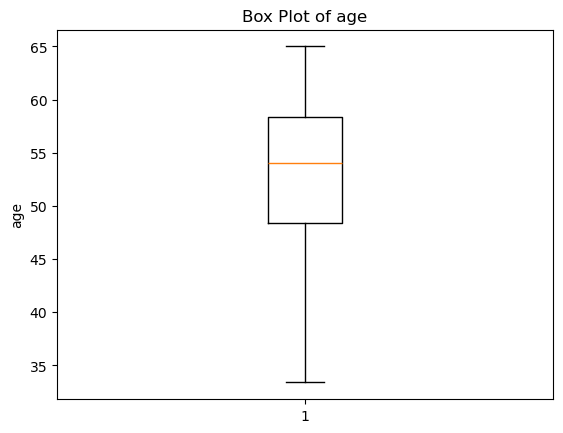

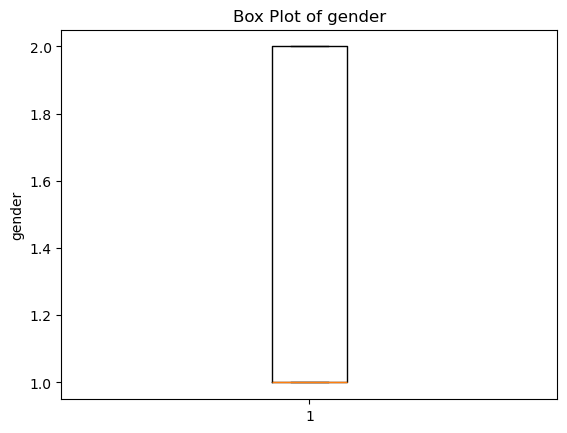

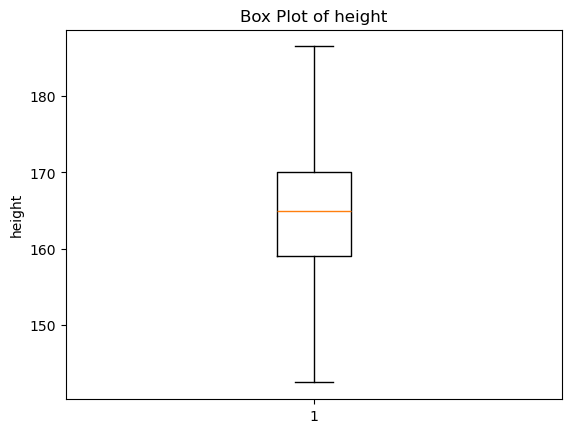

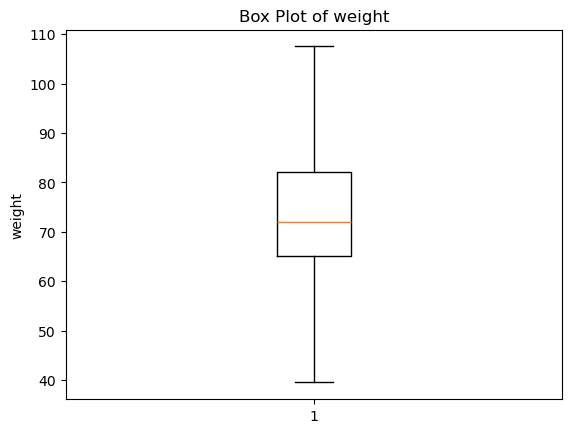

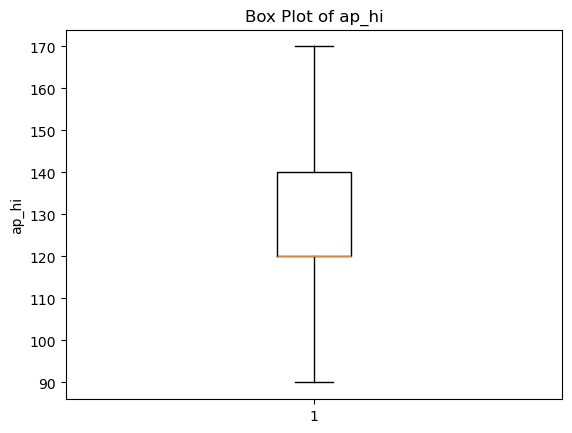

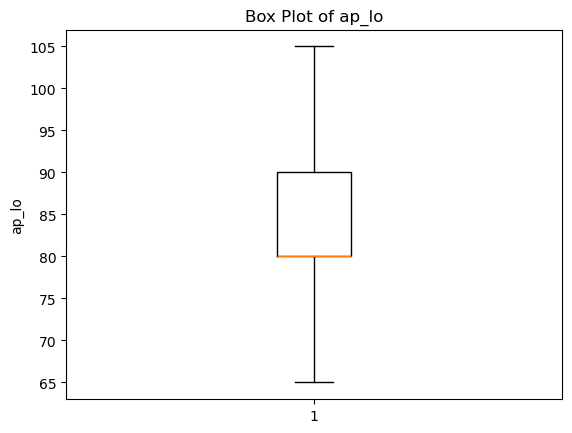

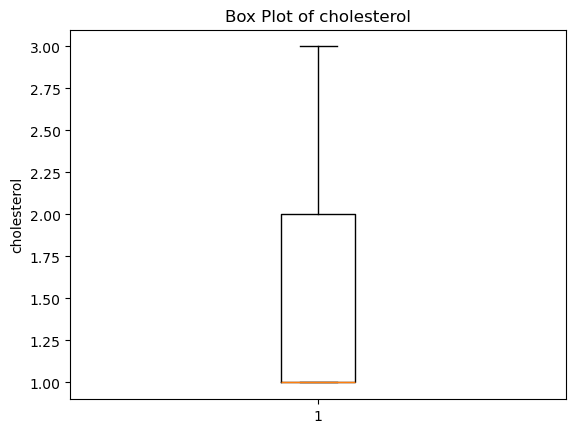

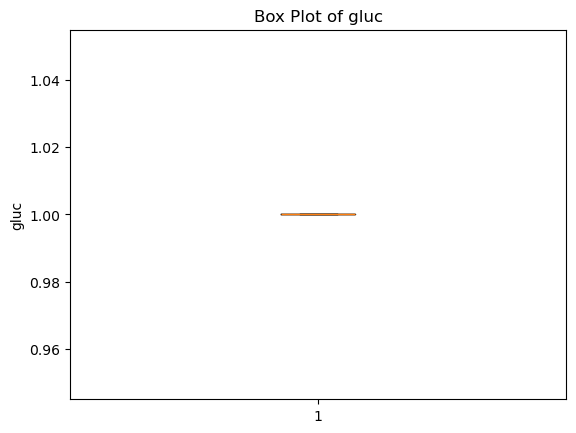

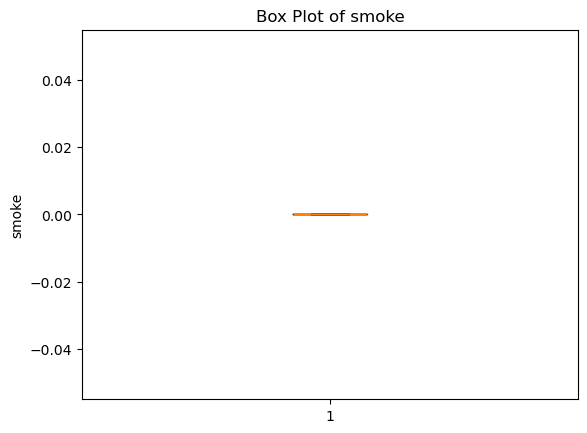

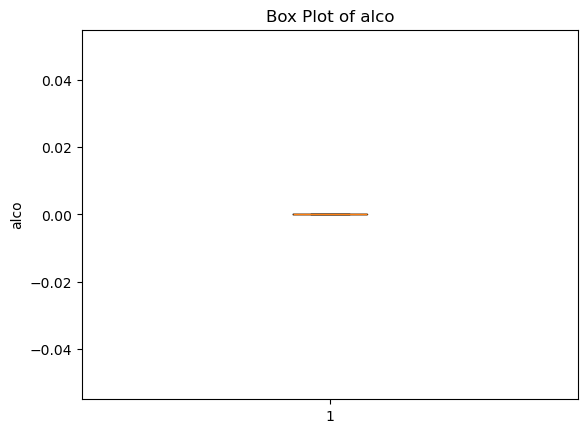

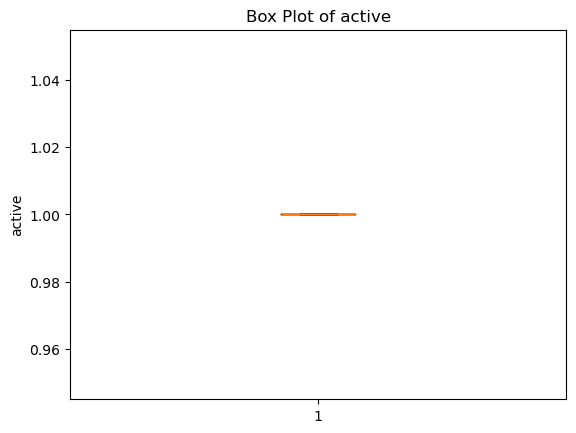

In [45]:
numeric_value = [
    'age', 'gender','height','weight','ap_hi','ap_lo',
    'cholesterol','gluc','smoke','alco','active'
]

for col in numeric_value:
    plt.figure()
    plt.boxplot(df[col].dropna())
    plt.title(f"Box Plot of {col}")
    plt.ylabel(col)
    plt.show()

In [11]:
print(df['cardio'].value_counts()) 

cardio
0    35021
1    34979
Name: count, dtype: int64


<h2>EDA</h2>

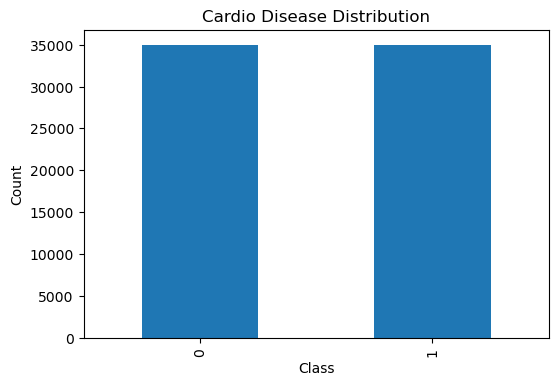

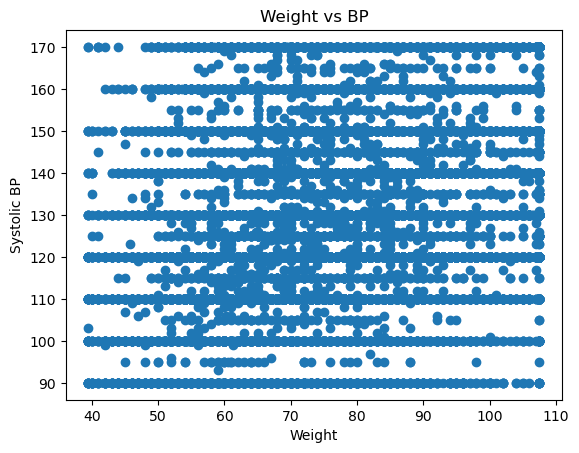

In [12]:
plt.figure(figsize=(6,4))
df['cardio'].value_counts().plot(kind='bar')
plt.title("Cardio Disease Distribution")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()

plt.scatter(df['weight'], df['ap_hi'])
plt.xlabel("Weight")
plt.ylabel("Systolic BP")
plt.title("Weight vs BP")
plt.show()


<h2>Target</h2>

In [13]:
y = df['cardio']

X_clipped = df.drop(["cardio", "id"], axis=1)

<h2>Feature Scaling</h2>

In [14]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_clipped[['age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol', 'gluc', 'smoke', 'alco', 'active']] = scaler.fit_transform( X_clipped[['age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol', 'gluc', 'smoke', 'alco', 'active']])

<h2>Train-Test Split</h2>

In [15]:
# X = df.drop(["cardio", "id"], axis=1)
# y= df["cardio"]

X_train, X_test, y_train, y_test = train_test_split(
    X_clipped, y,
    test_size=0.2,
    random_state=42
)

# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)

#stratify=y keeps disease proportion same in train & test
#80–20 split is standard
#To avoid overfitting we use random_state=42
#random_state=42 means that the random number generator will produce the same sequence of numbers each time you run the code, ensuring reproducibility

<h2> MODEL 1: Logistic Regression (Baseline Model)</h2>

In [16]:
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [17]:
y_pred_log = log_model.predict(X_test)

In [ ]:
#Precision is the ratio of correctly predicted positive observations to the total predicted positives

#Classification report is used to evaluate the precision, recall, f1-score of the model
    #recall is the ratio of correctly predicted positive observations to all actual positives
    #f1-score is the weighted average of precision and recall

#Confusion matrix is used to evaluate the performance of a classification algorithm

In [19]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("Accuracy:", accuracy_score(y_test, y_pred_log))
print("\nClassification Report:\n", classification_report(y_test, y_pred_log))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_log))

#Accuracy -> Overall correctness
#Recall (important here!) -> How many disease cases are correctly identified
#Confusion Matrix -> Shows false negatives (dangerous in medical data)

Accuracy: 0.7301428571428571

Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.78      0.74      6988
           1       0.76      0.68      0.72      7012

    accuracy                           0.73     14000
   macro avg       0.73      0.73      0.73     14000
weighted avg       0.73      0.73      0.73     14000


Confusion Matrix:
 [[5471 1517]
 [2261 4751]]


In [20]:
train_pred = log_model.predict(X_train)
test_pred = log_model.predict(X_test)

train_acc = accuracy_score(y_train, train_pred)
test_acc = accuracy_score(y_test, test_pred)

print("Training Accuracy:", train_acc)
print("Testing Accuracy:", test_acc)

Training Accuracy: 0.725875
Testing Accuracy: 0.7301428571428571


<h2>MODEL 2: Decision Tree</h2>

In [21]:
dt_model = DecisionTreeClassifier(
    max_depth=5,
    random_state=42
)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

In [22]:
y_pred_dt = dt_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("\nClassification Report:\n", classification_report(y_test, y_pred_dt))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))

Accuracy: 0.7355

Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.78      0.75      6988
           1       0.76      0.69      0.72      7012

    accuracy                           0.74     14000
   macro avg       0.74      0.74      0.73     14000
weighted avg       0.74      0.74      0.73     14000


Confusion Matrix:
 [[5467 1521]
 [2182 4830]]


In [23]:
train_pred = dt_model.predict(X_train)
test_pred = dt_model.predict(X_test)

train_acc = accuracy_score(y_train, train_pred)
test_acc = accuracy_score(y_test, test_pred)

print("Training Accuracy:", train_acc)
print("Testing Accuracy:", test_acc)

Training Accuracy: 0.7314821428571429
Testing Accuracy: 0.7355


<h2>MODEL 3: Random Forest</h2>

In [24]:
rf = RandomForestClassifier(n_estimators=200, max_depth=10, random_state=42);
rf.fit(X_train, y_train)

#n_estimators is the number of trees in the forest
#max_depth is the maximum depth of the tree
#random_state is used for reproducibility 

RandomForestClassifier(max_depth=10, n_estimators=200, random_state=42)

In [25]:
y_pred_rf = rf.predict(X_test)

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))

Random Forest Accuracy: 0.7390714285714286

Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.79      0.75      6988
           1       0.76      0.69      0.73      7012

    accuracy                           0.74     14000
   macro avg       0.74      0.74      0.74     14000
weighted avg       0.74      0.74      0.74     14000


Confusion Matrix:
 [[5491 1497]
 [2156 4856]]


In [ ]:
#Overfitting or underfitting

In [26]:
train_acc = rf.score(X_train, y_train)
test_acc = rf.score(X_test, y_test)

print("Train Accuracy:", train_acc)
print("Test Accuracy:", test_acc)

Train Accuracy: 0.752
Test Accuracy: 0.7390714285714286


<h2>Model Comparison Table</h2>

In [27]:
comparison = pd.DataFrame({
    'Model': ['Logistic Regression', 'Decision Tree', 'Random Forest'],
    'Accuracy': [
        accuracy_score(y_test, y_pred_log),
        accuracy_score(y_test, y_pred_dt),
        accuracy_score(y_test, y_pred_rf)
    ]
})

comparison

,Model,Accuracy
0,Logistic Regression,0.730143
1,Decision Tree,0.735500
2,Random Forest,0.739071


<h2>Confussion matrix</h2>

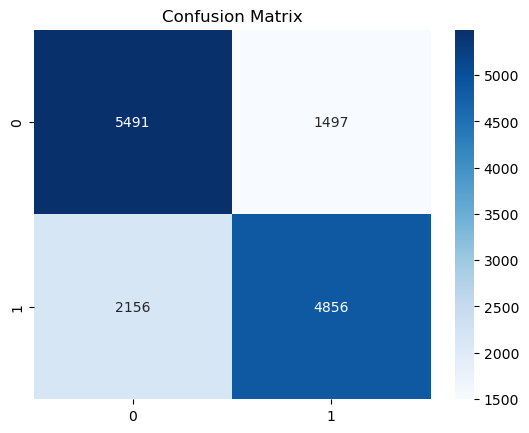

In [28]:
cm = confusion_matrix(y_test, y_pred_rf)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.show()

<h2>ROC Curve</h2>

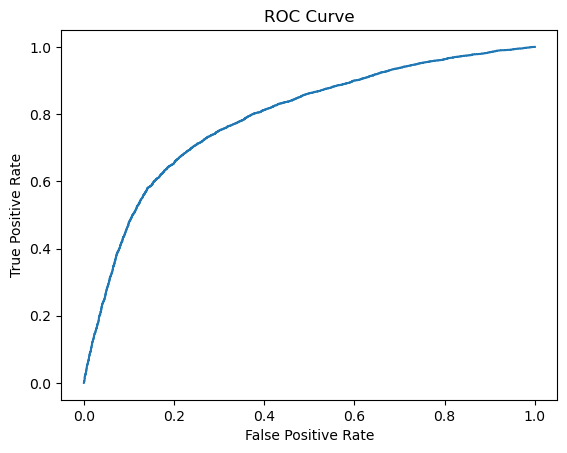

In [29]:
from sklearn.metrics import roc_curve, auc

y_prob = log_model.predict_proba(X_test)[:,1]
fpr, tpr, threshold = roc_curve(y_test, y_prob)

plt.plot(fpr, tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.show()

In [30]:
print(rf)
print(rf.n_features_in_)

RandomForestClassifier(max_depth=10, n_estimators=200, random_state=42)
11


<h2>Hyperparameter Tuning</h2>

In [31]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [5, 10, None]
}

grid = GridSearchCV(RandomForestClassifier(random_state=42),
                    param_grid, cv=3)
grid.fit(X_train, y_train)

model = grid.best_estimator_

In [32]:
print(X_clipped.columns.tolist())

['age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol', 'gluc', 'smoke', 'alco', 'active']


<h2>Import files</h2>

In [33]:
import joblib

joblib.dump(rf, "random_forest_model.pkl")
joblib.dump(scaler, "scaler.pkl")

['scaler.pkl']

In [34]:
import os
os.listdir()

['scaler.pkl',
 'random_forest_model.pkl',
 '.DS_Store',
 'Task3.ipynb',
 'anaconda_projects',
 'CardiovascularDisease-2.ipynb',
 'flask_app',
 'app.py',
 'templates',
 '.ipynb_checkpoints',
 'Task_2.csv',
 'Task_3.csv',
 'cardio_train.csv']